# Automating Crypto API key using Python 

In [26]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

HTTPSConnectionPool(host='sandbox-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000115A1D01C10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [27]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dc522885-2eae-4a3e-8381-2f43cf019629',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-24T17:05:52.098Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8818}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10783, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [28]:
type(data)

dict

In [29]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [30]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-01-24T17:05:52.098Z,0,None,19,1,None,8818


In [31]:
pd.json_normalize(data['data'])


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960729e+07,1.960729e+07,False,NaN,1,NaN,NaN,None,2024-01-24T17:04:00.000Z,40107.898117,2.417640e+10,-27.0913,0.161224,2.018375,-5.042596,-7.790895,6.177551,18.576470,7.864071e+11,50.2889,8.422659e+11,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,None,2024-01-24T17:04:00.000Z,2238.018600,1.122170e+10,-32.4599,0.213835,0.818771,-11.367265,-1.642286,7.603511,26.491853,2.689631e+11,17.1996,2.689631e+11,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-24T17:03:00.000Z,0.999541,4.147671e+10,-26.5227,-0.042646,0.057326,0.043433,-0.065738,-0.088586,-0.048585,9.553297e+10,6.1091,9.855553e+10,None,2024-01-24T17:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,None,2024-01-24T17:03:00.000Z,293.469364,9.745211e+08,-9.6944,-0.205867,-0.932909,-5.546386,10.494868,25.765509,33.234878,4.388780e+10,2.8065,4.388780e+10,None,2024-01-24T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.331523e+08,5.678930e+08,True,NaN,5,NaN,NaN,None,2024-01-24T17:04:00.000Z,87.565957,2.539757e+09,-22.8971,0.790097,4.894107,-10.587106,-28.487909,49.260245,183.629605,3.792940e+10,2.4255,4.972810e+10,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-24T17:04:00.000Z,0.516689,9.693217e+08,-33.9485,0.170308,1.163259,-8.832751,-18.481817,-16.741647,-5.932337,2.807679e+10,1.7954,5.166889e+10,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,16364,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.575495e+10,2.575495e+10,False,NaN,7,NaN,NaN,None,2024-01-24T17:04:00.000Z,1.000084,5.794250e+09,-22.8581,-0.019450,0.017400,0.010440,0.007041,0.023825,0.004883,2.575711e+10,1.6471,2.575711e+10,None,2024-01-24T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541073e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-24T17:03:00.000Z,0.474425,4.162143e+08,-28.8944,0.338869,1.372792,-9.863424,-23.734474,20.910166,67.876143,1.679975e+10,1.0743,2.134914e+10,None,2024-01-24T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.668302e+08,4.348631e+08,False,NaN,9,NaN,NaN,None,2024-01-24T17:03:00.000Z,31.570534,6.869295e+08,-12.5770,1.867270,8.216310,-11.226598,-34.141423,49.976723,201.679477,1.158102e+10,0.7406,2.273078e+10,None,2

In [32]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\tech\AppData\Local\Temp\ipykernel_12260\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960729e+07,1.960729e+07,False,NaN,1,NaN,NaN,None,2024-01-24T17:04:00.000Z,40107.898117,2.417640e+10,-27.0913,0.161224,2.018375,-5.042596,-7.790895,6.177551,18.576470,7.864071e+11,50.2889,8.422659e+11,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,None,2024-01-24T17:04:00.000Z,2238.018600,1.122170e+10,-32.4599,0.213835,0.818771,-11.367265,-1.642286,7.603511,26.491853,2.689631e+11,17.1996,2.689631e+11,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-24T17:03:00.000Z,0.999541,4.147671e+10,-26.5227,-0.042646,0.057326,0.043433,-0.065738,-0.088586,-0.048585,9.553297e+10,6.1091,9.855553e+10,None,2024-01-24T17:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 17:06:18.449774
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,None,2024-01-24T17:03:00.000Z,293.469364,9.745211e+08,-9.6944,-0.205867,-0.932909,-5.546386,10.494868,25.765509,33.234878,4.388780e+10,2.8065,4.388780e+10,None,2024-01-24T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.331523e+08,5.678930e+08,True,NaN,5,NaN,NaN,None,2024-01-24T17:04:00.000Z,87.565957,2.539757e+09,-22.8971,0.790097,4.894107,-10.587106,-28.487909,49.260245,183.629605,3.792940e+10,2.4255,4.972810e+10,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-24T17:04:00.000Z,0.516689,9.693217e+08,-33.9485,0.170308,1.163259,-8.832751,-18.481817,-16.741647,-5.932337,2.807679e+10,1.7954,5.166889e+10,None,2024-01-24T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
6,3408,USDC,USDC,usd-coin,16364,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.575495e+10,2.575495e+10,False,NaN,7,NaN,NaN,None,2024-01-24T17:04:00.000Z,1.000084,5.794250e+09,-22.8581,-0.019450,0.017400,0.010440,0.007041,0.023825,0.004883,2.575711e+10,1.6471,2.575711e+10,None,2024-01-24T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 17:06:18.449774
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541073e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-24T17:03:00.000Z,0.474425,4.162143e+08,-28.8944,0.338869,1.372792,-9.863424,-23.734474,20.910166,67.876143,1.679975e+10,1.0743,2.134914e+10,None,2024-01-24T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 17:06:18.449774
8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

In [61]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dc522885-2eae-4a3e-8381-2f43cf019629',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    #if not os.path.isfile(r'C:\Users\tech\OneDrive\Documents\python files sorter\pandas\API.csv'):
        #df.to_csv(r'C:\Users\tech\OneDrive\Documents\python files sorter\pandas\API.csv', header = 'column_names')
    #else:
         #df.to_csv(r'C:\Users\tech\OneDrive\Documents\python files sorter\pandas\API.csv' , mode='a', header=False)
        
    

In [62]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\tech\AppData\Local\Temp\ipykernel_12260\3322390186.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\tech\AppData\Local\Temp\ipykernel_12260\3322390186.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960729e+07,1.960729e+07,False,NaN,1,NaN,NaN,None,2024-01-24T18:09:00.000Z,40003.974842,2.334209e+10,-30.8733,-0.196500,1.342739,-5.609178,-8.273010,5.823967,17.755928,7.843694e+11,50.2671,8.400835e+11,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,None,2024-01-24T18:09:00.000Z,2225.020061,1.074746e+10,-36.7346,-0.559997,0.484183,-12.012466,-2.472046,7.067752,24.594400,2.674009e+11,17.1367,2.674009e+11,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-24T18:08:00.000Z,1.000066,4.023313e+10,-29.9360,0.022826,0.106712,0.075177,0.011963,-0.035827,-0.006466,9.558316e+10,6.1255,9.860731e+10,None,2024-01-24T18:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 18:09:52.385911
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,None,2024-01-24T18:08:00.000Z,292.120841,9.691886e+08,-11.2526,-0.294150,-1.634874,-5.784883,9.617040,24.967639,31.785865,4.368613e+10,2.7997,4.368613e+10,None,2024-01-24T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.331523e+08,5.678930e+08,True,NaN,5,NaN,NaN,None,2024-01-24T18:09:00.000Z,86.834674,2.471445e+09,-25.4717,-0.670012,4.917161,-12.606269,-30.190495,46.658982,177.064823,3.761264e+10,2.4104,4.931280e+10,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-24T18:09:00.000Z,0.516114,9.548761e+08,-35.3339,-0.028413,0.950181,-9.228404,-18.801185,-16.945031,-6.556190,2.804555e+10,1.7973,5.161140e+10,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
6,3408,USDC,USDC,usd-coin,16365,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.575495e+10,2.575495e+10,False,NaN,7,NaN,NaN,None,2024-01-24T18:09:00.000Z,1.000154,5.613694e+09,-26.7630,-0.007048,0.013183,0.000774,0.010831,0.024555,0.011117,2.575891e+10,1.6508,2.575891e+10,None,2024-01-24T18:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 18:09:52.385911
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541073e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-24T18:08:00.000Z,0.475055,4.129491e+08,-29.9759,0.265166,1.457025,-10.069685,-23.821934,20.889553,65.872626,1.682204e+10,1.0781,2.137747e+10,None,2024-01-24T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capita

In [65]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [66]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19607287.00000,19607287.00000,False,NaN,1,NaN,NaN,None,2024-01-24T18:09:00.000Z,40003.97484,23342090835.77731,-30.87330,-0.19650,1.34274,-5.60918,-8.27301,5.82397,17.75593,784369415874.46375,50.26710,840083471689.06006,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120179114.19818,120179114.19818,True,NaN,2,NaN,NaN,None,2024-01-24T18:09:00.000Z,2225.02006,10747457230.39760,-36.73460,-0.56000,0.48418,-12.01247,-2.47205,7.06775,24.59440,267400939977.46228,17.13670,267400939977.45999,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95576820991.71840,98600769245.77875,True,NaN,3,NaN,NaN,None,2024-01-24T18:08:00.000Z,1.00007,40233134459.41489,-29.93600,0.02283,0.10671,0.07518,0.01196,-0.03583,-0.00647,95583161102.62111,6.12550,98607309951.00000,None,2024-01-24T18:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 18:09:52.385911
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149548157.07750,149548157.07750,False,NaN,4,NaN,NaN,None,2024-01-24T18:08:00.000Z,292.12084,969188562.76971,-11.25260,-0.29415,-1.63487,-5.78488,9.61704,24.96764,31.78587,43686133430.58363,2.79970,43686133430.58000,None,2024-01-24T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,433152349.02523,567893010.76859,True,NaN,5,NaN,NaN,None,2024-01-24T18:09:00.000Z,86.83467,2471444687.37218,-25.47170,-0.67001,4.91716,-12.60627,-30.19050,46.65898,177.06482,37612642864.21175,2.41040,49312804252.80000,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54339837528.00000,99987984506.00000,False,NaN,6,NaN,NaN,None,2024-01-24T18:09:00.000Z,0.51611,954876115.80028,-35.33390,-0.02841,0.95018,-9.22840,-18.80118,-16.94503,-6.55619,28045549381.78942,1.79730,51611397195.18000,None,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:09:52.385911
6,3408,USDC,USDC,usd-coin,16365,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25754949700.96421,25754949700.96421,False,NaN,7,NaN,NaN,None,2024-01-24T18:09:00.000Z,1.00015,5613694394.30069,-26.76300,-0.00705,0.01318,0.00077,0.01083,0.02456,0.01112,25758907268.93146,1.65080,25758907268.93000,None,2024-01-24T18:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 18:09:52.385911
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35410725692.31700,36557079073.56500,False,NaN,8,NaN,NaN,None,2024-01-24T18:08:00.000Z,0.47505,412949120.26917,-29.97590,0.26517,1.45703,-10.06968,-23.82193,20.88955,65.87263,16822035560.10549,1.07810,21377466442.86000,None,2024-01-24T18:08:0

In [67]:
#the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20493,1.31432,-5.60600,-8.28925,5.80098,17.74603
Ethereum,-0.58541,0.45884,-12.00515,-2.51069,7.03459,24.58956
Tether USDt,0.01001,0.08321,0.05912,-0.01414,-0.05844,-0.02359
BNB,-0.29532,-1.64360,-5.78890,9.60162,24.96209,31.77428
Solana,-0.70839,4.65736,-12.64395,-30.35150,46.52945,176.72520
XRP,-0.05384,0.84592,-9.27787,-18.84235,-16.97718,-6.60493
USDC,-0.00652,0.00829,-0.01444,0.01689,0.02262,0.00701
Cardano,0.25068,1.43037,-10.09170,-23.84211,20.86482,65.82740
Avalanche,-0.78151,7.08032,-12.98441,-35.37875,47.01402,191.12261


In [68]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.20493
         quote.USD.percent_change_24h     1.31432
         quote.USD.percent_change_7d     -5.60600
         quote.USD.percent_change_30d    -8.28925
         quote.USD.percent_change_60d     5.80098
                                           ...   
Polygon  quote.USD.percent_change_24h     2.36154
         quote.USD.percent_change_7d    -11.03580
         quote.USD.percent_change_30d   -18.71755
         quote.USD.percent_change_60d    -5.45808
         quote.USD.percent_change_90d    16.60375
Length: 90, dtype: float64

In [69]:
type(df4)

pandas.core.series.Series

In [70]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.20493
        quote.USD.percent_change_24h   1.31432
        quote.USD.percent_change_7d   -5.60600
        quote.USD.percent_change_30d  -8.28925
        quote.USD.percent_change_60d   5.80098
...                                        ...
Polygon quote.USD.percent_change_24h   2.36154
        quote.USD.percent_change_7d  -11.03580
        quote.USD.percent_change_30d -18.71755
        quote.USD.percent_change_60d  -5.45808
        quote.USD.percent_change_90d  16.60375

[90 rows x 1 columns]

In [80]:
df5.count()

values    90
dtype: int64

In [103]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20493
1,Bitcoin,quote.USD.percent_change_24h,1.31432
2,Bitcoin,quote.USD.percent_change_7d,-5.60600
3,Bitcoin,quote.USD.percent_change_30d,-8.28925
4,Bitcoin,quote.USD.percent_change_60d,5.80098
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,2.36154
86,Polygon,quote.USD.percent_change_7d,-11.03580
87,Polygon,quote.USD.percent_change_30d,-18.71755
88,Polygon,quote.USD.percent_change_60d,-5.45808


In [104]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20493
1,Bitcoin,quote.USD.percent_change_24h,1.31432
2,Bitcoin,quote.USD.percent_change_7d,-5.60600
3,Bitcoin,quote.USD.percent_change_30d,-8.28925
4,Bitcoin,quote.USD.percent_change_60d,5.80098
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,2.36154
86,Polygon,quote.USD.percent_change_7d,-11.03580
87,Polygon,quote.USD.percent_change_30d,-18.71755
88,Polygon,quote.USD.percent_change_60d,-5.45808


In [105]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20493
1,Bitcoin,quote.USD.percent_change_24h,1.31432
2,Bitcoin,quote.USD.percent_change_7d,-5.60600
3,Bitcoin,quote.USD.percent_change_30d,-8.28925
4,Bitcoin,quote.USD.percent_change_60d,5.80098
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,2.36154
86,Polygon,quote.USD.percent_change_7d,-11.03580
87,Polygon,quote.USD.percent_change_30d,-18.71755
88,Polygon,quote.USD.percent_change_60d,-5.45808


In [125]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20493
1,Bitcoin,24h,1.31432
2,Bitcoin,7d,-5.60600
3,Bitcoin,30d,-8.28925
4,Bitcoin,60d,5.80098
...,...,...,...
85,Polygon,24h,2.36154
86,Polygon,7d,-11.03580
87,Polygon,30d,-18.71755
88,Polygon,60d,-5.45808


In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

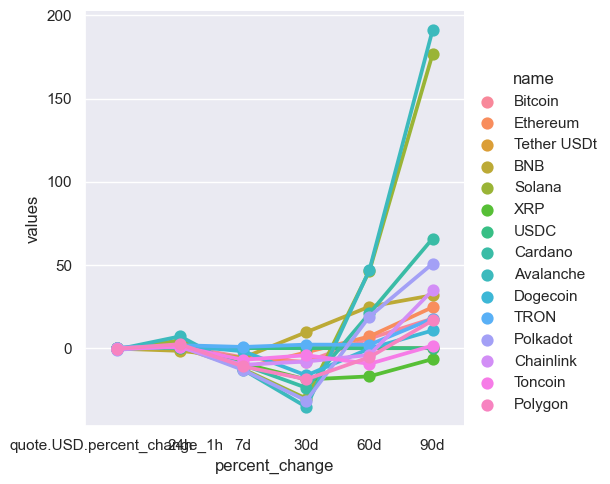

In [127]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [128]:
print(df.columns)


Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')


In [131]:
df10 = df[['name','quote.USD.price','quote.USD.last_updated','Timestamp']]
df10

,name,quote.USD.price,quote.USD.last_updated,Timestamp
0,Bitcoin,40003.97484,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911
1,Ethereum,2225.02006,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911
2,Tether USDt,1.00007,2024-01-24T18:08:00.000Z,2024-01-24 18:09:52.385911
3,BNB,292.12084,2024-01-24T18:08:00.000Z,2024-01-24 18:09:52.385911
4,Solana,86.83467,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911
5,XRP,0.51611,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911
6,USDC,1.00015,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911
7,Cardano,0.47505,2024-01-24T18:08:00.000Z,2024-01-24 18:09:52.385911
8,Avalanche,31.18128,2024-01-24T18:08:00.000Z,2024-01-24 18:09:52.385911
9,Dogecoin,0.07880,2024-01-24T18:09:00.000Z,2024-01-24 18:09:52.385911


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

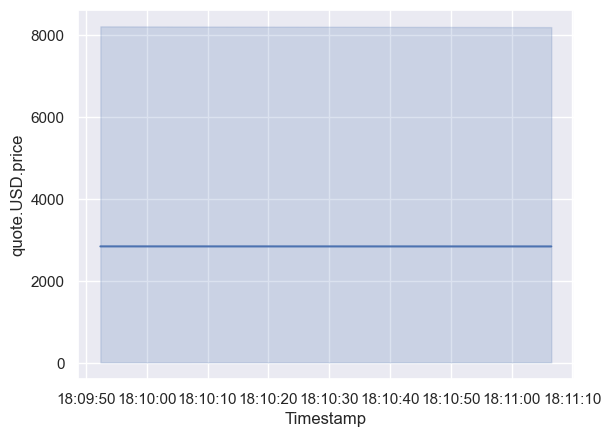

In [132]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df10)